# Customer Personality Analysis

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Attributes on Dataset

#### People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st

## Eksplorasi Dataset

In [4]:
#Membaca file csv untuk pengolahan dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")

#Menampilkan jumlah baris dan kolom pada dataset
print(df.shape)

#Membaca 5 baris pertama dari dataset
df.head()

#Karena tidak semua kolom ditampilkan, kita perlu menampilkan daftar kolom beserta tipe datanya
#df.info()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
#Menampilkan statistik dari kolom yang memiliki nilai bertipe numerik
print(df.describe())

#Menampilkan statistik dari kolom yang memiliki nilai bertipe objek/kategorik
print(df.select_dtypes(['object']).describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

## Apakah Education berpengaruh terhadap Income atau tidak?
### 1. Eksplorasi Dataset Education dan Income

In [6]:
#Menampilkan kolom Education dan Income dari dataset
df[['Education', 'Income']].head()

,Education,Income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
4,PhD,58293.0


In [7]:
#Menampilkan statistik dari kolom Education dan Income
print(df['Education'].describe(), '\n')
print(df['Income'].describe())

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object 

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


In [8]:
#Menampilkan jumlah nilai yang muncul pada kolom bertipe kategorik
print(df['Education'].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


### Data Cleaning dan Visualisasi Data

In [10]:
#Menghilangkan data dengan missing values pada Income
print(df['Income'].isnull().values.any())
df = df.dropna(subset=['Education', 'Income'])

False


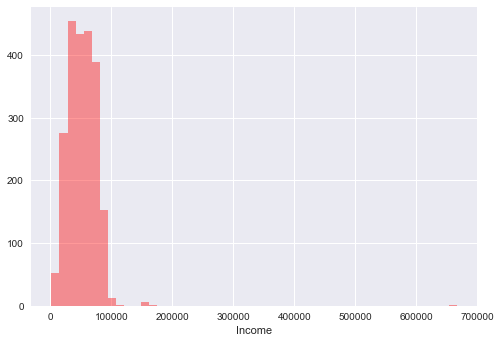

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['Income'], kde=False, color='red', bins=50)
plt.show()

Dari histogram di atas ada beberapa outlier yang akan kita hapus

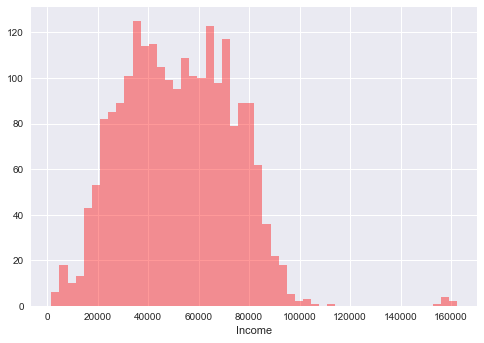

In [13]:
#Menghilangkan data dengan Income >= 200000
df.drop(df[df['Income'] >= 200000].index, inplace=True)

#Menampilkan histogram setelah data cleaning untuk pengecekan
sns.distplot(df['Income'], kde=False, color='red', bins=50)
plt.show()

Masih ada outliers!

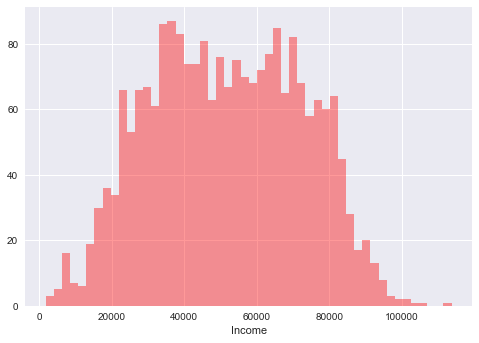

In [15]:
#Menghilangkan data dengan Income >= 120000
df.drop(df[df['Income'] >= 120000].index, inplace=True)

#Menampilkan histogram setelah data cleaning untuk pengecekan
sns.distplot(df['Income'], kde=False, color='red', bins=50)
plt.show()

In [18]:
#Menampilkan statistik dari kolom Education dan Income setelah data cleaning
print(df['Income'].describe(), '\n')
print(df['Education'].describe(), '\n')

#Menampilkan jumlah nilai yang muncul pada Education setelah data cleaning
print(df['Education'].value_counts())

count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64 

count           2208
unique             5
top       Graduation
freq            1113
Name: Education, dtype: object 

Graduation    1113
PhD            477
Master         364
2n Cycle       200
Basic           54
Name: Education, dtype: int64


### Data Wrangling

In [19]:
#Membagi data ke dalam 5 subset data sesuai 5 jenis Education
dfgrad = df[df['Education']=='Graduation']
dfphd = df[df['Education']=='PhD']
dfmaster = df[df['Education']=='Master']
df2nc = df[df['Education']=='2n Cycle']
dfbasic = df[df['Education']=='Basic']

In [20]:
#Menampilkan statistik income dari masing-masing subset
print('Statistik pendapatan dari customer dengan tingkat pendidikan Graduation \n', dfgrad['Income'].describe(), '\n')
print('Statistik pendapatan dari customer dengan tingkat pendidikan PhD \n', dfphd['Income'].describe(), '\n')
print('Statistik pendapatan dari customer dengan tingkat pendidikan Master \n', dfmaster['Income'].describe(), '\n')
print('Statistik pendapatan dari customer dengan tingkat pendidikan 2n Cycle \n', df2nc['Income'].describe(), '\n')
print('Statistik pendapatan dari customer dengan tingkat pendidikan Basic \n', dfbasic['Income'].describe(), '\n')

Statistik pendapatan dari customer dengan tingkat pendidikan Graduation 
 count      1113.000000
mean      51984.008086
std       20918.205185
min        1730.000000
25%       34824.000000
50%       51948.000000
75%       69755.000000
max      105471.000000
Name: Income, dtype: float64 

Statistik pendapatan dari customer dengan tingkat pendidikan PhD 
 count       477.000000
mean      55279.935010
std       18389.610436
min        4023.000000
25%       40344.000000
50%       55012.000000
75%       69063.000000
max      113734.000000
Name: Income, dtype: float64 

Statistik pendapatan dari customer dengan tingkat pendidikan Master 
 count      364.000000
mean     52629.579670
std      19419.253764
min       6560.000000
25%      37697.250000
50%      50920.500000
75%      66658.500000
max      98777.000000
Name: Income, dtype: float64 

Statistik pendapatan dari customer dengan tingkat pendidikan 2n Cycle 
 count      200.000000
mean     47633.190000
std      22119.081838
min       7500

In [32]:
#Menampilkan standar deviasi dari masing-masing subset
print('Sebaran pendapatan dari customer dengan tingkat pendidikan Graduation \n', dfgrad['Income'].std(), '\n')
print('Sebaran pendapatan dari customer dengan tingkat pendidikan PhD \n', dfphd['Income'].std(), '\n')
print('Sebaran pendapatan dari customer dengan tingkat pendidikan Master \n', dfmaster['Income'].std(), '\n')
print('Sebaran pendapatan dari customer dengan tingkat pendidikan 2n Cycle \n', df2nc['Income'].std(), '\n')
print('Sebaran pendapatan dari customer dengan tingkat pendidikan Basic \n', dfbasic['Income'].std(), '\n')

Sebaran pendapatan dari customer dengan tingkat pendidikan Graduation 
 20918.205184764593 

Sebaran pendapatan dari customer dengan tingkat pendidikan PhD 
 18389.610436158426 

Sebaran pendapatan dari customer dengan tingkat pendidikan Master 
 19419.253764015008 

Sebaran pendapatan dari customer dengan tingkat pendidikan 2n Cycle 
 22119.08183787594 

Sebaran pendapatan dari customer dengan tingkat pendidikan Basic 
 6235.066773288436 



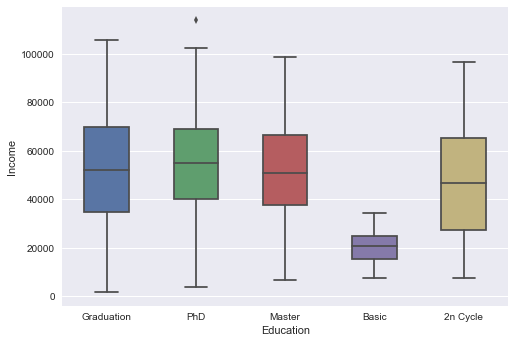

In [31]:
#Menampilkan boxplot masing-masing subset data
sns.boxplot( x=df["Education"], y=df["Income"], width=0.5)
plt.show()

### Pengujian Hipotesis

Hipotesis yang akan kita buktikan adalah

H0 = Education tidak mempunyai pengaruh terhadap Income

H1 = Education mempunyai pengaruh signifikan terhadap Income

In [22]:
#Pengujian dengan ANOVA
anova_test = st.f_oneway(dfgrad['Income'], dfphd['Income'], dfmaster['Income'], df2nc['Income'], dfbasic['Income'])

if anova_test.pvalue > 0.05:
    print('Tingkat pendidikan customer tidak berpengaruh pada pendapatan customer')
else:
    print('Tingkat pendidikan customer mempunyai pengaruh signifikan pada pendapatan customer')

Tingkat pendidikan customer mempunyai pengaruh signifikan pada pendapatan customer
